In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import find_peaks
from windrose import WindroseAxes




- Loading the data into a dataframe

In [2]:
df = pd.read_csv('../data/sierraleone-bumbuna.csv')

### 1. Summary Statistics & Missing-Value Report

In [3]:
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [4]:
df.shape

(525600, 19)

In [5]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [6]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


- Checking for duplicated rows

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [9]:
df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

- Since the comments column has all null values I will remove that

In [10]:
df.drop(columns=['Comments'],inplace=True)

### 2. Outlier Detection & Basic Cleaning

In [11]:
selected_columns = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
z_scores = np.abs(stats.zscore(df[selected_columns]))
outliers = (z_scores > 3).any(axis=1)
print(outliers.sum())

16292


- There are 7740 rows with outliers in the data

In [12]:
df['z_outlier'] = outliers

In [13]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,z_outlier
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,False
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,False
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,False
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,False
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,False


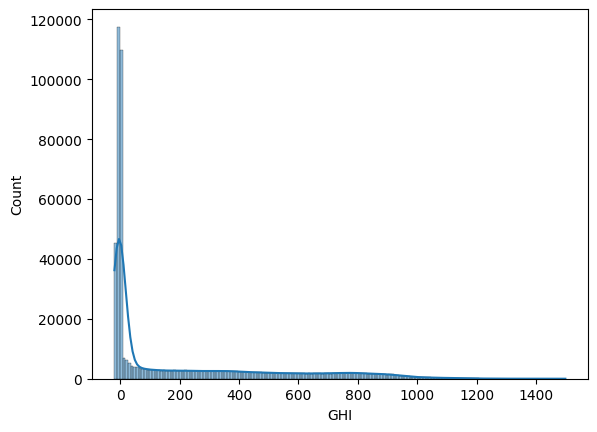

1.3064893898532448


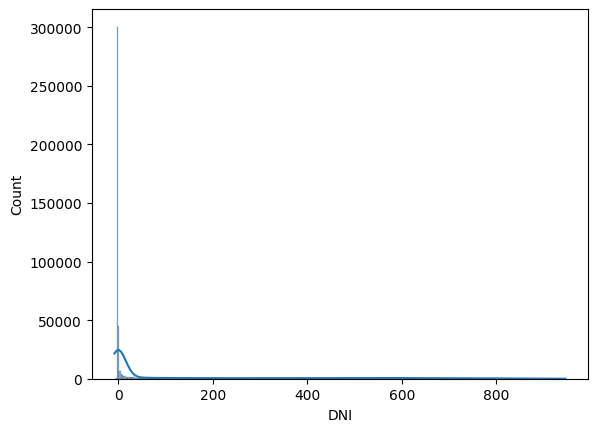

1.7784227127841132


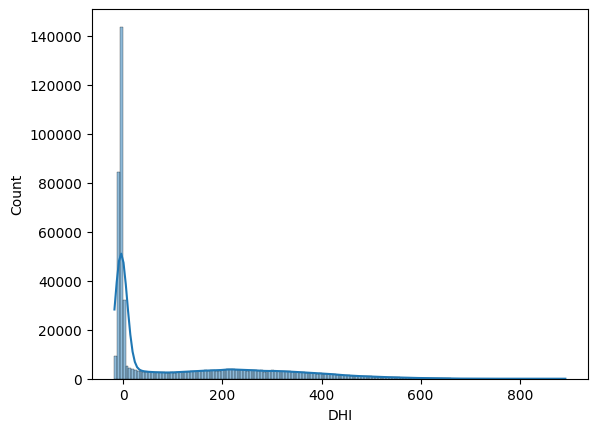

1.135893520062293


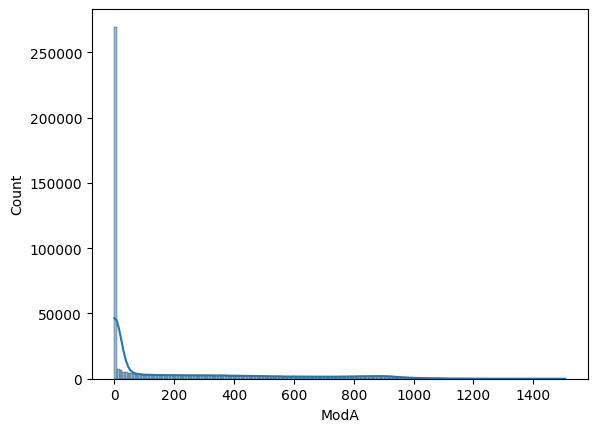

1.3193511681316668


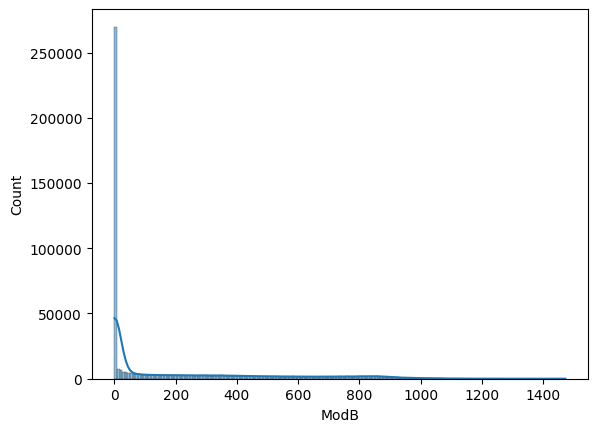

1.3302661031803877


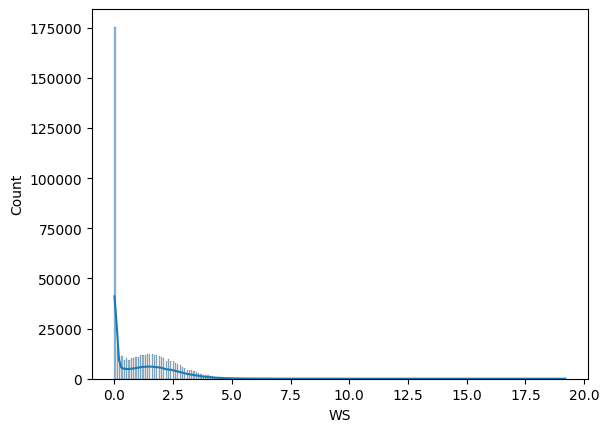

1.1877624000457159


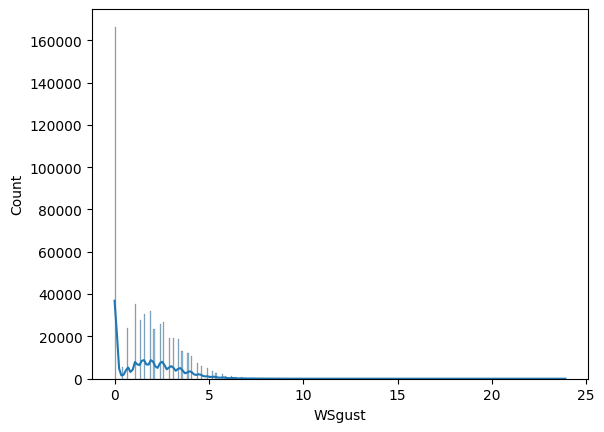

1.079324295898672


In [14]:
for column in selected_columns:
    sns.histplot(df[column], kde=True)
    plt.show()
    print(df[column].skew())

In [15]:
df.to_csv('../data/sierraleone_clean.csv', index=False)

### 3. Time Series Analysis

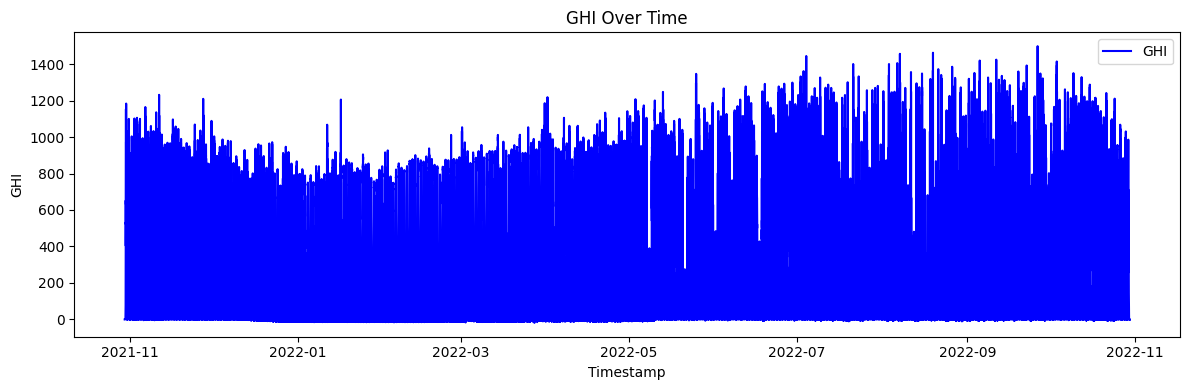

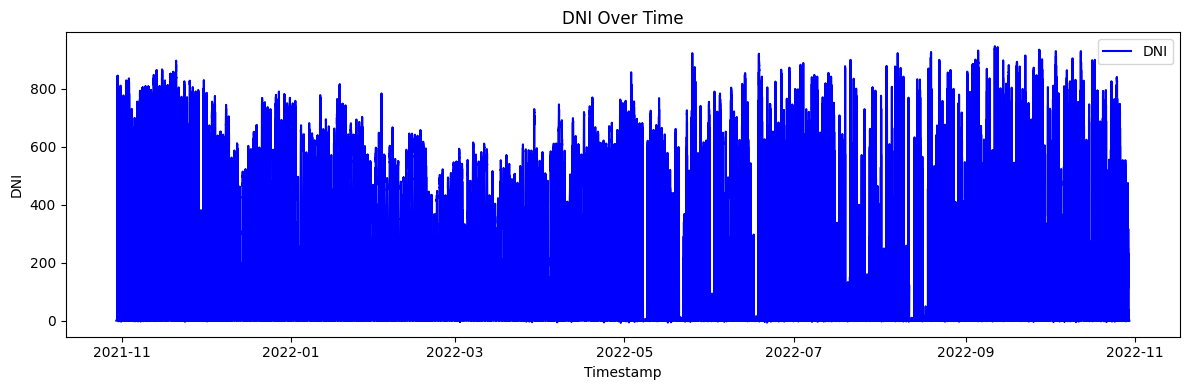

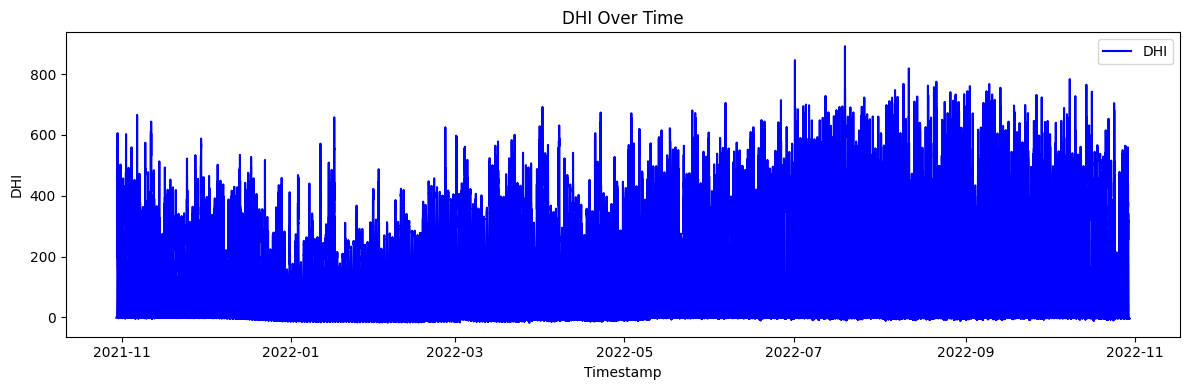

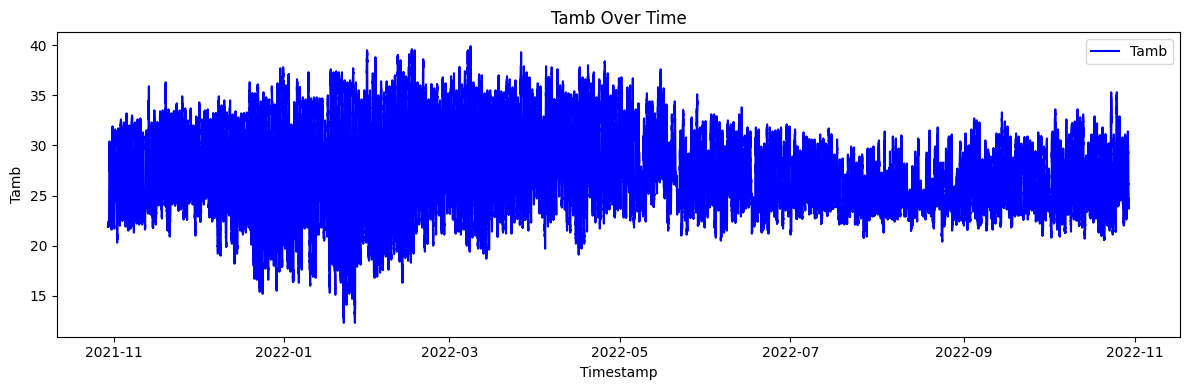

In [16]:


df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# List of columns to plot separately
columns = ['GHI', 'DNI', 'DHI', 'Tamb']

# Create a separate plot for each column
for col in columns:
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[col], label=col, color='blue')
    plt.title(f'{col} Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [17]:
df['Month'] = df.index.month
df['Hour'] = df.index.hour

Monthly average patters

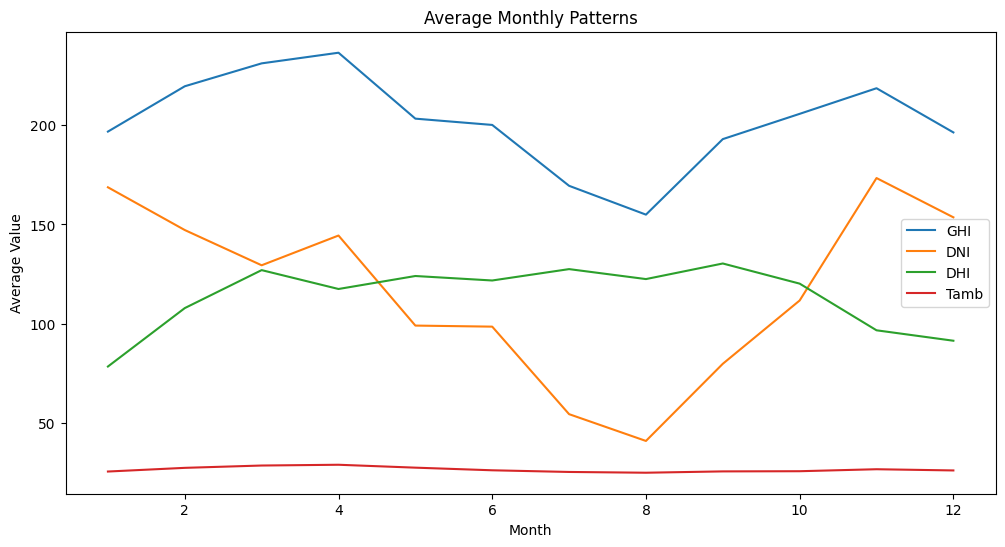

In [18]:
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

plt.figure(figsize=(12,6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    sns.lineplot(data=monthly_avg, x='Month', y=col, label=col)

plt.title('Average Monthly Patterns')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.legend()
plt.show()

Daily trends by hours

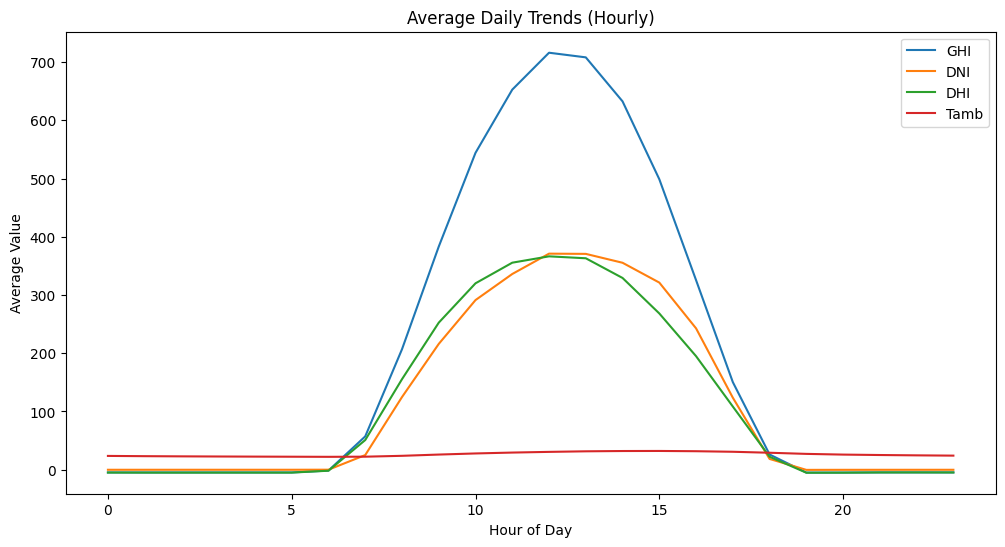

In [19]:
daily_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

plt.figure(figsize=(12,6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    sns.lineplot(data=daily_avg, x='Hour', y=col, label=col)

plt.title('Average Daily Trends (Hourly)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.legend()
plt.show()

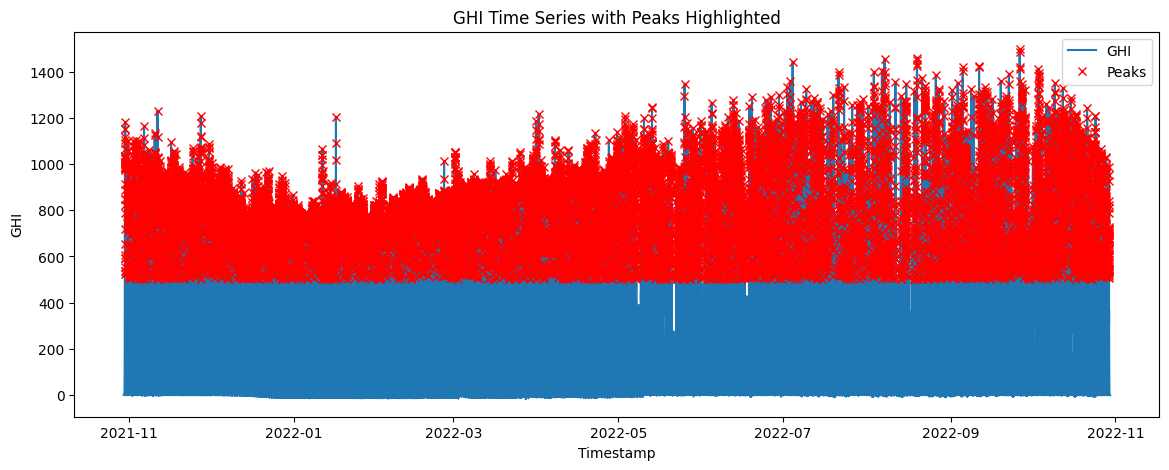

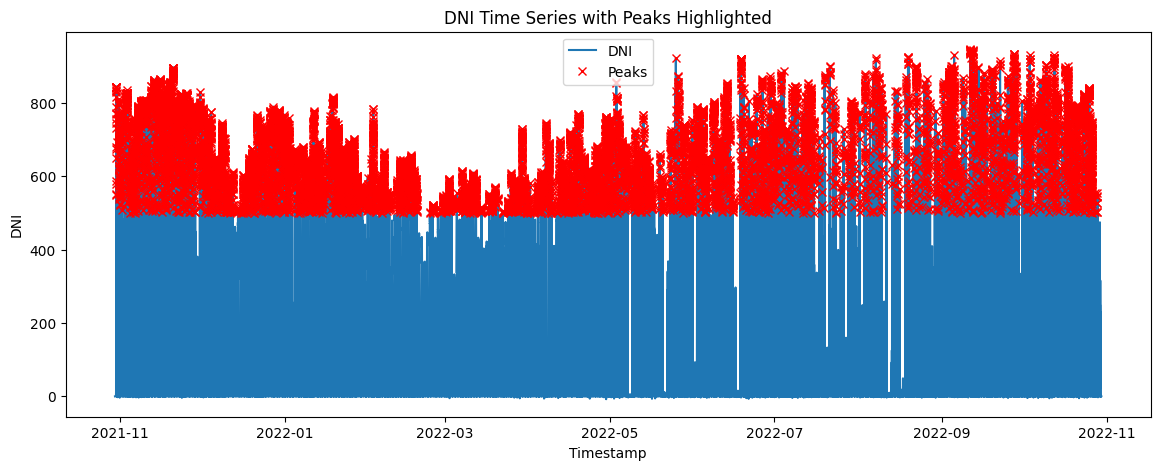

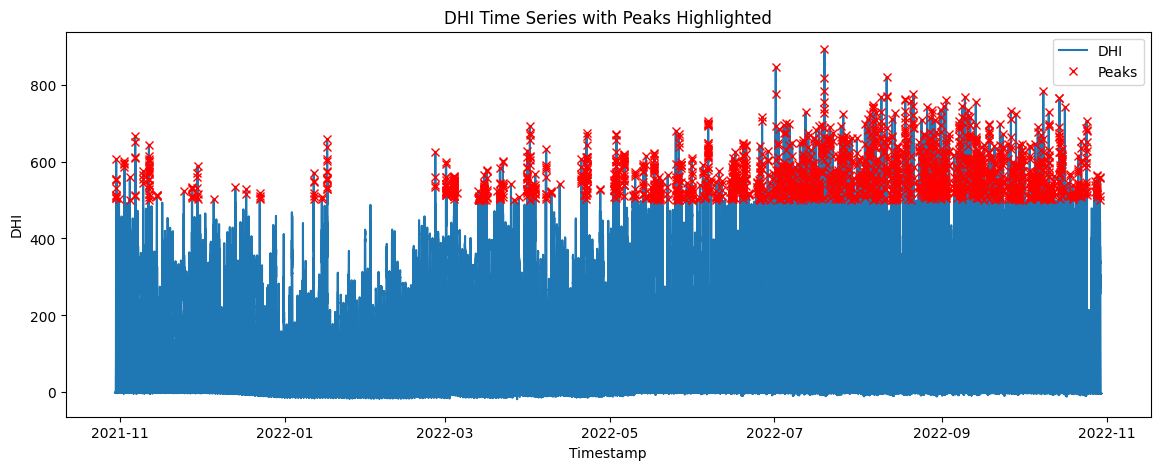

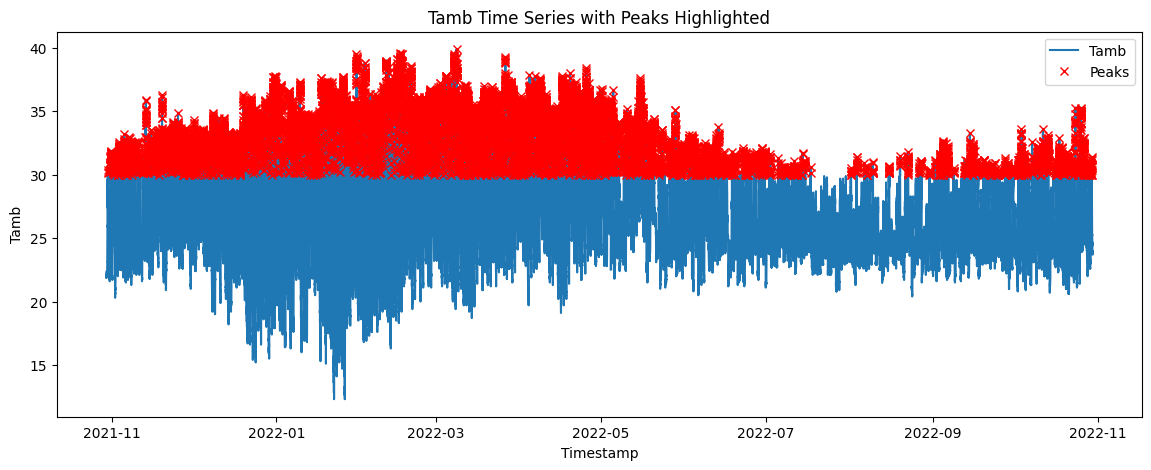

In [20]:
variables = ['GHI', 'DNI', 'DHI', 'Tamb']

for var in variables:
    values = df[var].values
    
    # Adjust height threshold per variable for meaningful peak detection
    if var == 'Tamb':
        # For temperature, peaks could be the max temperatures (adjust as needed)
        peaks, _ = find_peaks(values, height=30)  
    else:
        # For irradiance variables, set a threshold depending on typical values
        peaks, _ = find_peaks(values, height=500)
    
    plt.figure(figsize=(14, 5))
    plt.plot(df.index, values, label=var)
    plt.plot(df.index[peaks], values[peaks], "x", label='Peaks', color='red')
    plt.title(f'{var} Time Series with Peaks Highlighted')
    plt.xlabel('Timestamp')
    plt.ylabel(var)
    plt.legend()
    plt.show()

### 4. Cleaning Impact

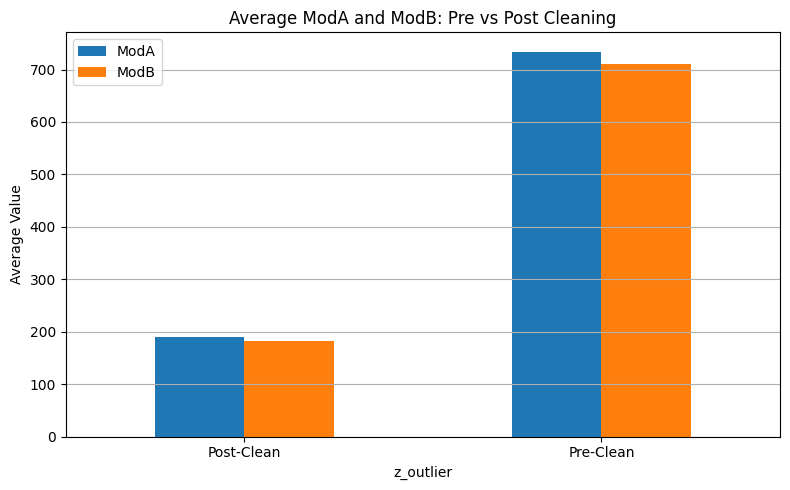

In [21]:
mean_values = df.groupby(df['z_outlier'])[['ModA', 'ModB']].mean().reset_index()
mean_values['z_outlier'] = mean_values['z_outlier'].map({True: 'Pre-Clean', False: 'Post-Clean'})

mean_values.set_index('z_outlier').plot(kind='bar', figsize=(8, 5))
plt.title('Average ModA and ModB: Pre vs Post Cleaning')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 5. Correlation & Relationship Analysis

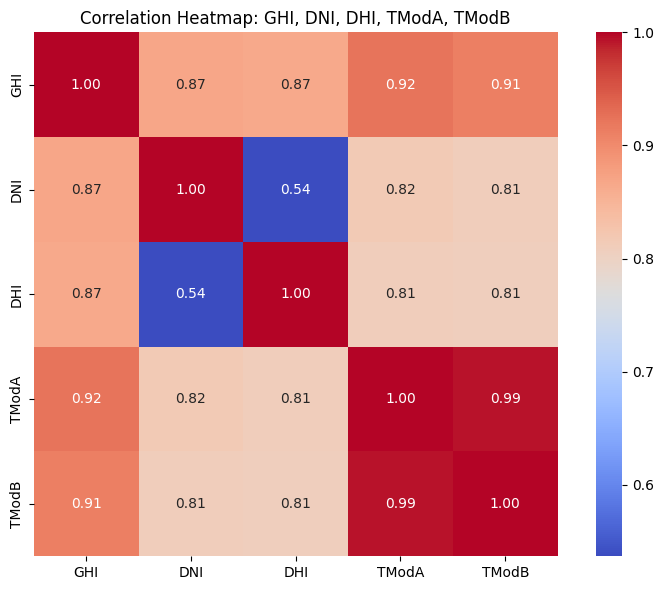

In [22]:
cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap: GHI, DNI, DHI, TModA, TModB')
plt.tight_layout()
plt.show()

### 6. Wind and Distribution Analysis

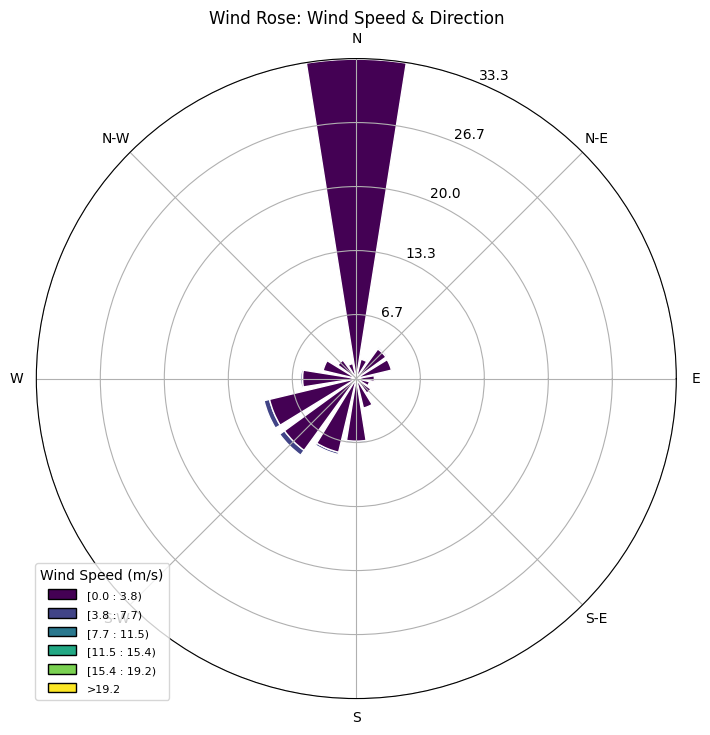

In [23]:
# Wind Rose Plot
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose: Wind Speed & Direction')
plt.show()

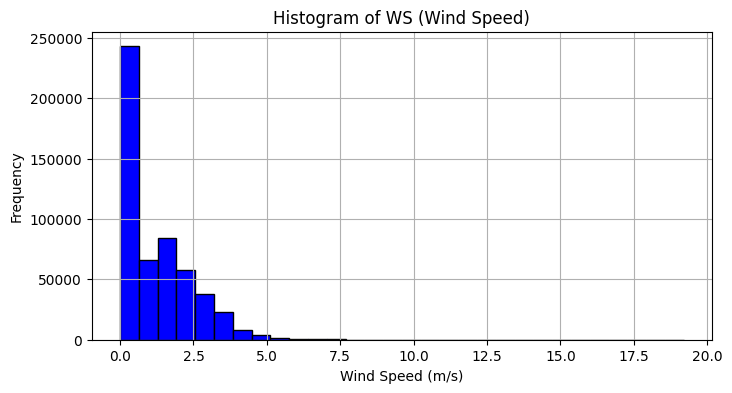

In [24]:
# Histogram for WS (Wind Speed)
plt.figure(figsize=(8, 4))
plt.hist(df['WS'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of WS (Wind Speed)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

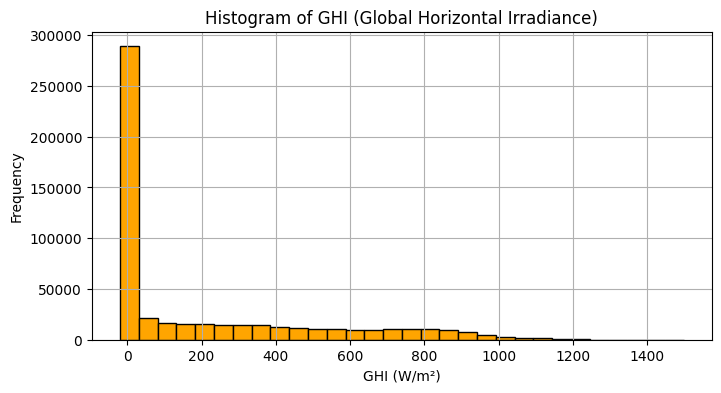

In [25]:
# Histogram for GHI
plt.figure(figsize=(8, 4))
plt.hist(df['GHI'], bins=30, color='orange', edgecolor='black')
plt.title('Histogram of GHI (Global Horizontal Irradiance)')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 7. Temperature Analysis

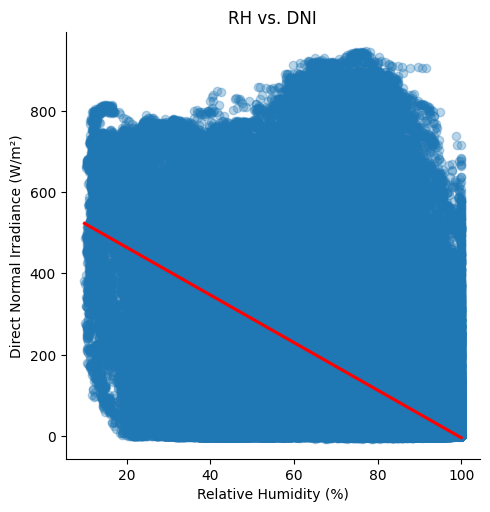

In [26]:
#  RH vs. DNI
sns.lmplot(x='RH', y='DNI', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('RH vs. DNI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Direct Normal Irradiance (W/m²)')
plt.show()

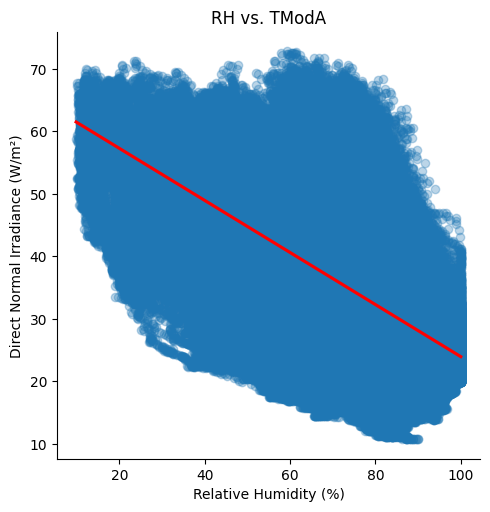

In [27]:
sns.lmplot(x='RH', y='TModA', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('RH vs. TModA')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Direct Normal Irradiance (W/m²)')
plt.show()

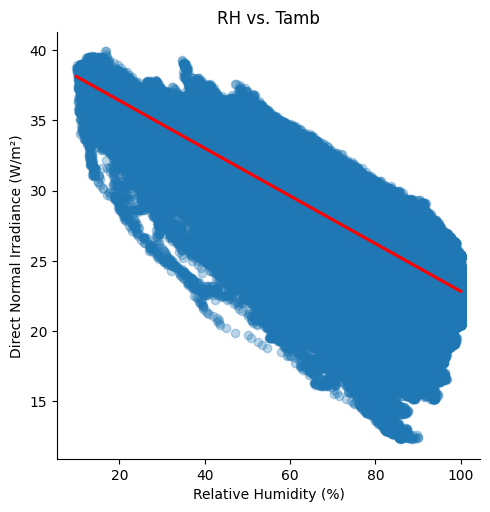

In [28]:
sns.lmplot(x='RH', y='Tamb', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('RH vs. Tamb')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Direct Normal Irradiance (W/m²)')
plt.show()

### 8. Bubble Chart

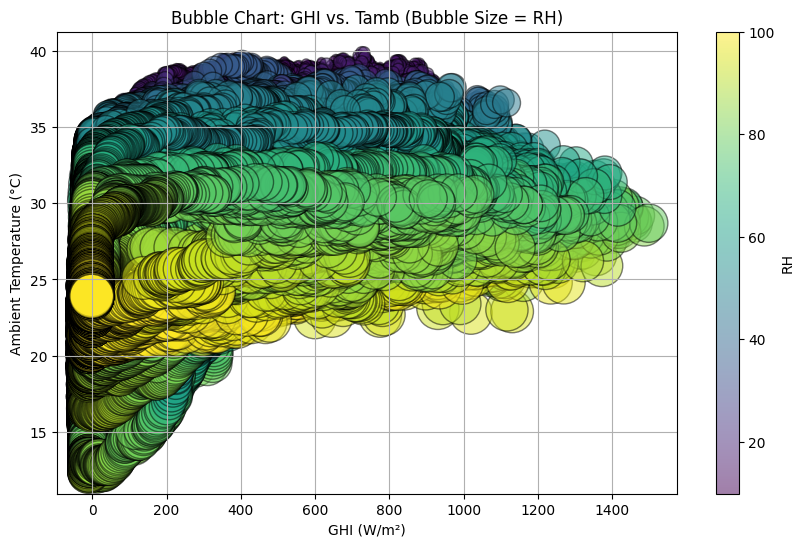

In [29]:
bubble_var = 'RH' 
bubble_size = (df[bubble_var] - df[bubble_var].min()) / (df[bubble_var].max() - df[bubble_var].min()) * 1000
plt.figure(figsize=(10, 6))
plt.scatter(df['GHI'], df['Tamb'], s=bubble_size, alpha=0.5, c=df[bubble_var], cmap='viridis', edgecolors='k')
plt.title(f'Bubble Chart: GHI vs. Tamb (Bubble Size = {bubble_var})')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.colorbar(label=bubble_var)
plt.grid(True)
plt.show()